# 1.Setup

A configuração de setup é o processo de preparar e organizar o ambiente para uso. Envolvendo a instalação de bibliotecas e configuração de outros ajustes necessários. O objetivo é criar um ambiente funcional para executar tarefas específicas.

## 1.1.Conexão com drive

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (csv).

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import pandas
import sklearn

In [3]:
cnpjs_4 = pd.read_csv('/content/drive/MyDrive/T4M8G2/DADOS/CNPJ/cnpjs_4.csv', delimiter=';')

In [4]:
cnpjs_4

,data,cnpj,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,...,cep,ddd_1,telefone_1,ddd_2,telefone_2,ddd_fax,fax,email,situacao_especial,data_situacao_especial
0,2021-11-23,7984836000117,7984836,1,17,1,MAXIMUS ESPACO E EVENTOS,2,2021-07-29,0,...,69900078,68.0,32231532.0,NaN,NaN,68.0,32230444.0,contagecontabilidade2016@gmail.com,NaN,NaN
1,2021-11-23,34548163000125,34548163,1,25,1,Times Club,2,2019-08-15,0,...,69900312,68.0,99871950.0,NaN,NaN,NaN,NaN,jailton.gadelha@bol.com.br,NaN,NaN
2,2021-11-23,42044345000197,42044345,1,97,1,DISTRIBUIDORA MOURA,2,2021-05-21,0,...,69900445,68.0,99885514.0,NaN,NaN,NaN,NaN,alineabe97@hotmail.com,NaN,NaN
3,2021-11-23,43274883000130,43274883,1,30,1,DINARTE,2,2021-08-25,0,...,69900520,68.0,99444686.0,NaN,NaN,NaN,NaN,alan.dinarte1020@gmail.com,NaN,NaN
4,2021-11-23,36401418000158,36401418,1,58,1,ESQUENTA BRASIL PUB,2,2020-02-17,0,...,69900709,68.0,99883337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894895,2022-09-11,42598876000121,42598876,1,21,1,DISTRIBUIDORA JD,2,2021-07-06,0,...,64980000,89.0,94327587.0,NaN,NaN,NaN,NaN,silvacarvalhoedinalva@gmail.com,NaN,NaN
894896,2022-09-11,43996664000165,43996664,1,65,1,BAR DO FILHO,2,2021-10-25,0,...,64980000,89.0,99831643.0,NaN,NaN,NaN,NaN,bardofilho71@gmail.com,NaN,NaN
894897,2022-09-11,41312248000175,41312248,1,75,1,ANAJU EMPREENDIMENTOS,2,2021-03-22,0,...,64993000,89.0,81364436.0,NaN,NaN,NaN,NaN,ericas.canuto@gmail.com,NaN,NaN
894898,2022-09-11,31455182000119,31455182,1,19,1,BAR E RESTAURANTE JLS,2,2018-09-10,0,...,64993000,89.0,35781343.0,NaN,NaN,NaN,NaN,guilapereiracarvaljo@hotmail.com,NaN,NaN


In [5]:
quantidadeLinhas = cnpjs_4.shape[0]
print("A tabela possui", quantidadeLinhas, "linhas.")

A tabela possui 894900 linhas.


In [6]:
cnpjs_4.describe()

,cnpj,cnpj_basico,cnpj_ordem,cnpj_dv,identificador_matriz_filial,situacao_cadastral,motivo_situacao_cadastral,nome_cidade_exterior,id_pais,cnae_fiscal_principal,...,id_municipio_rf,cep,ddd_1,telefone_1,ddd_2,telefone_2,ddd_fax,fax,situacao_especial,data_situacao_especial
count,8.949000e+05,8.949000e+05,894900.000000,894900.000000,894900.000000,894900.0,894900.0,0.0,7601.0,894900.0,...,894900.000000,8.949000e+05,894306.000000,8.943060e+05,21290.000000,2.130900e+04,10745.000000,1.071300e+04,0.0,0.0
mean,3.915532e+13,3.915532e+07,1.005934,44.920069,1.004159,2.0,0.0,NaN,105.0,5611205.0,...,5407.548752,4.798078e+07,46.416204,8.035955e+07,30.315735,4.563969e+07,39.511587,4.076976e+07,NaN,NaN
std,7.777992e+12,7.777992e+06,0.154243,30.496655,0.064357,0.0,0.0,NaN,0.0,0.0,...,2759.848927,2.857451e+07,85.864182,2.443810e+07,29.829444,4.012468e+07,24.809409,2.114949e+07,NaN,NaN
min,5.854100e+10,5.854100e+04,1.000000,0.000000,1.000000,2.0,0.0,NaN,105.0,5611205.0,...,1.000000,1.003001e+06,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,NaN
25%,3.605951e+13,3.605951e+07,1.000000,17.000000,1.000000,2.0,0.0,NaN,105.0,5611205.0,...,3623.000000,2.305520e+07,21.000000,8.101979e+07,0.000000,0.000000e+00,16.000000,3.241622e+07,NaN,NaN
50%,4.081102e+13,4.081102e+07,1.000000,44.000000,1.000000,2.0,0.0,NaN,105.0,5611205.0,...,5913.000000,4.170685e+07,41.000000,9.141430e+07,22.000000,3.521775e+07,35.000000,3.447210e+07,NaN,NaN
75%,4.417857e+13,4.417857e+07,1.000000,71.000000,1.000000,2.0,0.0,NaN,105.0,5611205.0,...,7191.000000,7.336854e+07,67.000000,9.739072e+07,51.000000,9.124203e+07,61.000000,3.821290e+07,NaN,NaN
max,9.755177e+13,9.755176e+07,29.000000,99.000000,2.000000,2.0,0.0,NaN,105.0,5611205.0,...,9997.000000,9.998000e+07,5561.000000,1.000000e+08,99.000000,1.000000e+08,167.000000,1.000000e+08,NaN,NaN


In [7]:
cnpjs_4.info() #aqui podemos ver que não há valores nulos "RangeIndex: 6157939 entries, 0 to 6157938"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894900 entries, 0 to 894899
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   data                         894900 non-null  object 
 1   cnpj                         894900 non-null  int64  
 2   cnpj_basico                  894900 non-null  int64  
 3   cnpj_ordem                   894900 non-null  int64  
 4   cnpj_dv                      894900 non-null  int64  
 5   identificador_matriz_filial  894900 non-null  int64  
 6   nome_fantasia                811714 non-null  object 
 7   situacao_cadastral           894900 non-null  int64  
 8   data_situacao_cadastral      894460 non-null  object 
 9   motivo_situacao_cadastral    894900 non-null  int64  
 10  nome_cidade_exterior         0 non-null       float64
 11  id_pais                      7601 non-null    float64
 12  data_inicio_atividade        894900 non-null  object 
 13 

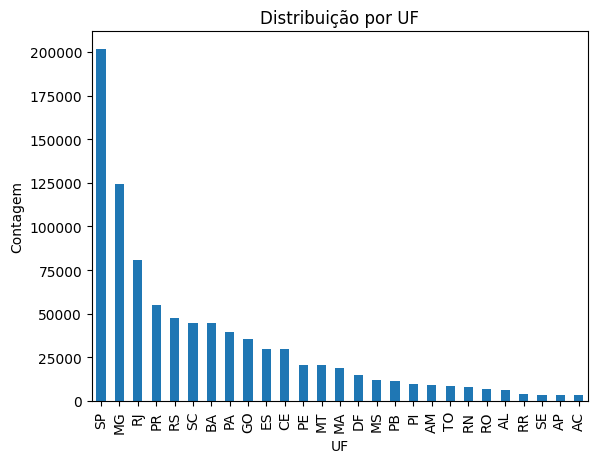

In [8]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_4['sigla_uf'].value_counts().plot(kind='bar')
plt.title("Distribuição por UF")
plt.xlabel("UF")
plt.ylabel("Contagem")
plt.show()


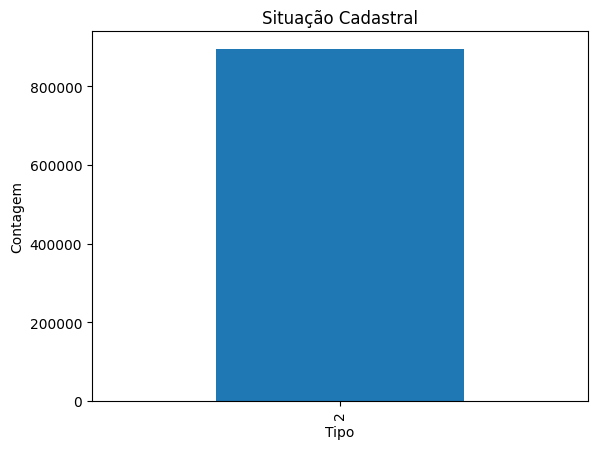

In [9]:
# Exemplo de gráfico de barras
cnpjs_4['situacao_cadastral'].value_counts().plot(kind='bar')
plt.title("Situação Cadastral")
plt.xlabel("Tipo")
plt.ylabel("Contagem")
plt.show()


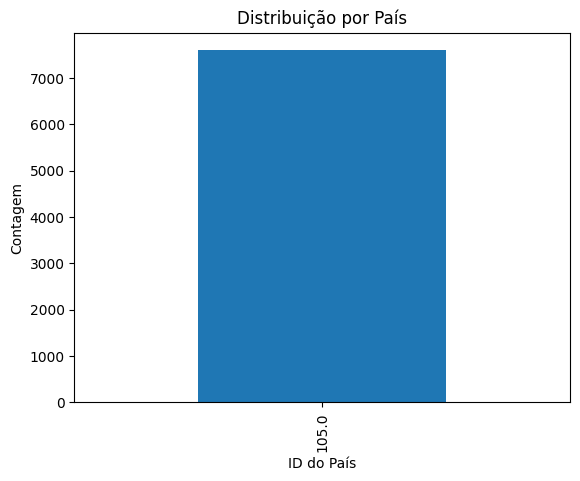

In [10]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_4['id_pais'].value_counts().plot(kind='bar')
plt.title("Distribuição por País")
plt.xlabel("ID do País")
plt.ylabel("Contagem")
plt.show()



#dicionario dos ids dos paises

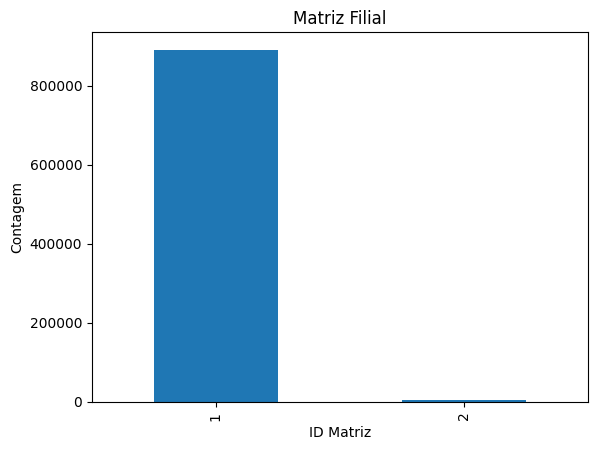

In [11]:
import matplotlib.pyplot as plt

# Exemplo de gráfico de barras
cnpjs_4['identificador_matriz_filial'].value_counts().plot(kind='bar')
plt.title("Matriz Filial")
plt.xlabel("ID Matriz")
plt.ylabel("Contagem")
plt.show()

In [12]:
cnpjs_4['cnae_fiscal_principal'].value_counts()

5611205    894900
Name: cnae_fiscal_principal, dtype: int64

In [13]:
cnpjs_4['cnpj_basico'].value_counts()

20446508    61
38382844    42
19900543    42
10992355    42
42095249    42
            ..
49722438     1
49629533     1
45424219     1
49739305     1
47568314     1
Name: cnpj_basico, Length: 92408, dtype: int64

In [14]:
cnpjs_4['id_municipio'].value_counts()

3550308    41631
3304557    25539
3106200    15386
5300108    14664
2927408    12650
           ...  
4203105        1
2303956        1
1720804        1
2905156        1
4314548        1
Name: id_municipio, Length: 4784, dtype: int64

In [15]:
numero_de_valores_unicos = cnpjs_4['cnpj'].nunique()

print(f"O número de valores únicos na coluna 'cnpj' é: {numero_de_valores_unicos}")

O número de valores únicos na coluna 'cnpj' é: 92612
